# Reconocimiento de Instrumento Principal en una Señal de Audio

Este notebook busca desarrollar un algoritmo para detectar el instrumento principal en una señal de audio.

## El Dataset

Será usado el IRMAS Dataset (https://www.upf.edu/web/mtg/irmas).

El dataset se divide en datos de entrenamiento y prueba.

### Datos de entrenamiento

**Archivos de audio:** 6705 archivos de audio en formato wav estéreo de 16 bits muestreados a 44.1kHz. Son extractos de 3 segundos de más de 2000 grabaciones distintas.

**Anotaciones:** la indicación del instrumento predominante de cada extracto está tanto en el nombre de la carpeta contenedora como en el nombre del archivo: cello (cel), clarinete (cla), flauta (flu), guitarra acústica (gac), guitarra eléctrica (gel), órgano (org), piano (pia), saxofón (sax), trompeta (tru), violín (vio) y voz humana (voi). El número de archivos por instrumento es: cel(388), cla(505), flu(451), gac(637), gel(760), org(682), pia(721), sax(626), tru(577), vio(580), voi(778).

Además, algunos de los archivos tienen una anotación en el nombre del archivo con respecto a la presencia ([dru]) o no presencia ([nod]) de la batería, y el género musical: country-folk ([cou_fol]), classical ([cla]) , pop-rock ([pop-roc]), latin-soul ([lat-sou]).

El dataset incluye música actual y del siglo pasado, por lo que se percibe la difierecia en la calidad de audio de algunos extractos. Además, abarca una gran variabilidad en los tipos de instrumentos musicales, intérpretes, articulaciones, así como estilos generales de grabación y producción. Además, tratamos de maximizar la distribución de los géneros musicales dentro de la colección para evitar la extracción de información relacionada con las características del género. Se pagó a dos estudiantes para obtener los datos de 11 instrumentos de las pistas de música preseleccionadas, con el objetivo de extraer extractos que contengan una presencia continua de un único instrumento de destino predominante. Por lo tanto, no se permitió asignar más de un instrumento a un extracto dado.

### Datos de prueba

**Audio:** 2874 extractos en formato wav estéreo de 16 bits muestreados a 44.1kHz.

**Archivos de anotación:** Las anotaciones para un extracto llamado: "excerptName.wav" se dan en "excerptName.txt". Se puede anotar más de un instrumento en cada extracto, una etiqueta por línea.

# Empecemos con el notebook!

# Imports iniciales

In [1]:
# Preaparando los imports
import os
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd
import keras

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


# Preparacion del Dataset

In [2]:
# Prueba de lectura
rate, data = wav.read("C:/Users/pedri/Downloads/IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav")

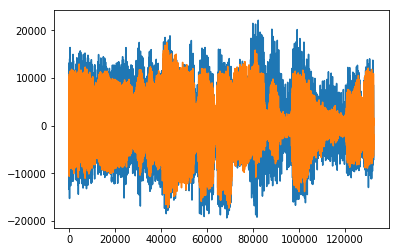

In [3]:
%matplotlib inline
plt.plot(data)
plt.show()

**Nota:** La señal es stereo... Luego observo si esto tiene algún impacto

In [4]:
# Probando la lectura de varios archivos

base_directory = "./IRMAS-TrainingData/"

for path, dirs, files in os.walk(base_directory):
    for filename in files:
        s = path.split("/")[-1]
        print(s)
        print(os.path.join(path, filename))

cel
./IRMAS-TrainingData/cel\008__[cel][nod][cla]0058__1.wav
cel
./IRMAS-TrainingData/cel\008__[cel][nod][cla]0058__2.wav
cel
./IRMAS-TrainingData/cel\008__[cel][nod][cla]0058__3.wav
cel
./IRMAS-TrainingData/cel\012__[cel][nod][cla]0043__1.wav
cel
./IRMAS-TrainingData/cel\012__[cel][nod][cla]0043__2.wav
cel
./IRMAS-TrainingData/cel\012__[cel][nod][cla]0043__3.wav
cel
./IRMAS-TrainingData/cel\013__[cel][nod][cla]0025__1.wav
cel
./IRMAS-TrainingData/cel\013__[cel][nod][cla]0025__2.wav
cel
./IRMAS-TrainingData/cel\013__[cel][nod][cla]0025__3.wav
cel
./IRMAS-TrainingData/cel\014__[cel][nod][cla]0041__1.wav
cel
./IRMAS-TrainingData/cel\014__[cel][nod][cla]0041__2.wav
cel
./IRMAS-TrainingData/cel\014__[cel][nod][cla]0041__3.wav
cel
./IRMAS-TrainingData/cel\027__[cel][nod][cla]0027__1.wav
cel
./IRMAS-TrainingData/cel\027__[cel][nod][cla]0027__2.wav
cel
./IRMAS-TrainingData/cel\027__[cel][nod][cla]0027__3.wav
cel
./IRMAS-TrainingData/cel\031__[cel][nod][cla]0020__1.wav
cel
./IRMAS-TrainingData

./IRMAS-TrainingData/flu\[flu][cla]0361__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0361__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0361__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0362__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0362__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0362__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0363__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0363__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0363__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0366__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0366__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0366__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0367__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0367__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0367__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0368__1.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0368__2.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0368__3.wav
flu
./IRMAS-TrainingData/flu\[flu][cla]0369__1.wav
flu
./IRMAS-TrainingData/flu\[flu][

gac
./IRMAS-TrainingData/gac\[gac][pop_roc]0737__3.wav
gel
./IRMAS-TrainingData/gel\001__[gel][dru][pop_roc]0829__1.wav
gel
./IRMAS-TrainingData/gel\001__[gel][dru][pop_roc]0829__2.wav
gel
./IRMAS-TrainingData/gel\001__[gel][dru][pop_roc]0829__3.wav
gel
./IRMAS-TrainingData/gel\004__[gel][dru][pop_roc]0941__1.wav
gel
./IRMAS-TrainingData/gel\004__[gel][dru][pop_roc]0941__2.wav
gel
./IRMAS-TrainingData/gel\004__[gel][dru][pop_roc]0941__3.wav
gel
./IRMAS-TrainingData/gel\005__[gel][nod][jaz_blu]0822__1.wav
gel
./IRMAS-TrainingData/gel\005__[gel][nod][jaz_blu]0822__2.wav
gel
./IRMAS-TrainingData/gel\005__[gel][nod][jaz_blu]0822__3.wav
gel
./IRMAS-TrainingData/gel\006__[gel][dru][pop_roc]0975__1.wav
gel
./IRMAS-TrainingData/gel\006__[gel][dru][pop_roc]0975__2.wav
gel
./IRMAS-TrainingData/gel\006__[gel][dru][pop_roc]0975__3.wav
gel
./IRMAS-TrainingData/gel\007__[gel][dru][pop_roc]0943__1.wav
gel
./IRMAS-TrainingData/gel\007__[gel][dru][pop_roc]0943__2.wav
gel
./IRMAS-TrainingData/gel\007__[

org
./IRMAS-TrainingData/org\[org][jaz_blu]1197__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1197__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1197__3.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1198__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1198__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1198__3.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1199__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1199__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1199__3.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1200__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1200__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1200__3.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1201__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1201__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1201__3.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1202__1.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1202__2.wav
org
./IRMAS-TrainingData/org\[org][jaz_blu]1202__3.wav
org
./IRMA

./IRMAS-TrainingData/pia\[pia][jaz_blu]1520__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1520__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1520__3.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1521__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1521__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1521__3.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1522__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1522__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1522__3.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1523__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1523__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1523__3.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1524__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1524__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1524__3.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1525__1.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1525__2.wav
pia
./IRMAS-TrainingData/pia\[pia][jaz_blu]1525__3.wav
pia
./IRMAS-Tr

./IRMAS-TrainingData/tru\[tru][pop_roc]1937__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1941__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1941__2.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1941__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1944__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1944__2.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1944__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1947__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1947__2.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1947__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1950__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1950__2.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1950__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1955__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1955__2.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1955__3.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1958__1.wav
tru
./IRMAS-TrainingData/tru\[tru][pop_roc]1958__2.wav
tru
./IRMAS-Tr

./IRMAS-TrainingData/voi\206__[voi][dru][pop_roc]2475__2.wav
voi
./IRMAS-TrainingData/voi\206__[voi][dru][pop_roc]2475__3.wav
voi
./IRMAS-TrainingData/voi\207__[voi][dru][cou_fol]2414__1.wav
voi
./IRMAS-TrainingData/voi\207__[voi][dru][cou_fol]2414__2.wav
voi
./IRMAS-TrainingData/voi\207__[voi][dru][cou_fol]2414__3.wav
voi
./IRMAS-TrainingData/voi\209__[voi][nod][cou_fol]2422__1.wav
voi
./IRMAS-TrainingData/voi\209__[voi][nod][cou_fol]2422__2.wav
voi
./IRMAS-TrainingData/voi\209__[voi][nod][cou_fol]2422__3.wav
voi
./IRMAS-TrainingData/voi\213__[voi][nod][cou_fol]2381__1.wav
voi
./IRMAS-TrainingData/voi\213__[voi][nod][cou_fol]2381__2.wav
voi
./IRMAS-TrainingData/voi\213__[voi][nod][cou_fol]2381__3.wav
voi
./IRMAS-TrainingData/voi\214__[voi][nod][cou_fol]2372__1.wav
voi
./IRMAS-TrainingData/voi\214__[voi][nod][cou_fol]2372__2.wav
voi
./IRMAS-TrainingData/voi\214__[voi][nod][cou_fol]2372__3.wav
voi
./IRMAS-TrainingData/voi\215__[voi][dru][pop_roc]2326__1.wav
voi
./IRMAS-TrainingData/voi\

In [5]:
# Preparar el dataset
instrument_encoding = {
    "cel": 0, 
    "cla": 1, 
    "flu": 2, 
    "gac": 3, 
    "gel": 4, 
    "org": 5, 
    "pia": 6,
    "sax": 7, 
    "tru": 8,
    "vio": 9, 
    "voi": 10
}

start_dir = "./IRMAS-TrainingData/"

dataset = list()

for path, dirs, files in os.walk(start_dir):
    for filename in files:
        row = dict()
        instrument = path.split("/")[-1]
        rate, audio_signal = wav.read(os.path.join(path, filename))
        row["instrument"] = instrument_encoding[instrument]
        row["audio"] = audio_signal
        dataset.append(row)

training_data = pd.DataFrame(dataset)

In [6]:
training_data.head(10)

,audio,instrument
0,"[[-82, 30], [-73, 40], [-62, 49], [-49, 58], [...",0
1,"[[30, 46], [22, 41], [17, 36], [10, 26], [10, ...",0
2,"[[-247, -303], [-224, -294], [-200, -296], [-1...",0
3,"[[-329, 363], [-363, 268], [-423, 174], [-494,...",0
4,"[[28, -596], [-40, -596], [-69, -620], [-189, ...",0
5,"[[814, 337], [877, 442], [884, 410], [866, 239...",0
6,"[[-194, -79], [-158, -45], [-119, -3], [-148, ...",0
7,"[[1113, 1160], [1162, 1205], [1182, 1207], [11...",0
8,"[[-2070, -2096], [-2057, -2088], [-1855, -1910...",0
9,"[[1152, 349], [1213, 489], [1242, 596], [1200,...",0


In [7]:
print(training_data.dtypes)

audio         object
instrument     int64
dtype: object


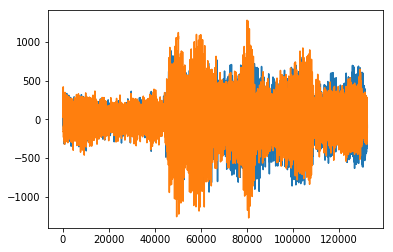

In [8]:
%matplotlib inline
plt.plot(training_data['audio'][0])
plt.show()

**Nota:** Lista la carga de archivos "básica", todavía hace falta estudiar si hacen falta parametros del filename

### One-hot encoding para las salidas

In [9]:
# Please less hardcode the line below
num_classes = len(instrument_encoding)

y_train = keras.utils.to_categorical(training_data['instrument'], num_classes)

In [10]:
y_train.shape

(6705, 11)